In [1]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



# Make an adjacency matrix for n vertices that have k separated components, by manipulating the rectangular blocks of "zero-throughout".

1.k=3の時

In [2]:
n1<-10
tr1 <- make_tree(n1, mode = "undirected")
M1<-get.adjacency(tr1)
M1<-as.matrix(M1)
M1

0,1,1,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0
0,1,0,0,0,0,0,1,1,0
0,1,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0


In [3]:
n2<-5
tr2 <- make_tree(n2, mode = "undirected")
M2<-get.adjacency(tr2)
M2<-as.matrix(M2)
M2

0,1,1,0,0
1,0,0,1,1
1,0,0,0,0
0,1,0,0,0
0,1,0,0,0


In [4]:
n3<-7
tr3 <- make_tree(n3, mode = "undirected")
M3<-get.adjacency(tr3)
M3<-as.matrix(M3)
M3

0,1,1,0,0,0,0
1,0,0,1,1,0,0
1,0,0,0,0,1,1
0,1,0,0,0,0,0
0,1,0,0,0,0,0
0,0,1,0,0,0,0
0,0,1,0,0,0,0


In [5]:
#なんでも良いのでn×nの行列の箱を作る
n<-n1+n2+n3
M<-matrix(1,n,n)

In [6]:
#箱に3つの隣接行列とゼロのブロックを埋めていく
#まず3つの隣接行列を対角に埋める
M[1:n1,1:n1]<-M1
M[(n1+1):(n1+n2),(n1+1):(n1+n2)]<-M2
M[(n1+n2+1):n,(n1+n2+1):n]<-M3

#ゼロブロック：1からn1行
M[1:n1,(n1+1):(n1+n2)]<-0
M[1:n1,(n2+1):(n1+n2+n3)]<-0

#ゼロブロック：n1+1からn1+n2行
M[(n1+1):(n1+n2),1:n1]<-0
M[(n1+1):(n1+n2),(n1+n2+1):(n1+n2+n3)]<-0

#ゼロブロック：n1+n2+1からn1+n2+n3行
M[(n1+n2+1):(n1+n2+n3),1:n1]<-0
M[(n1+n2+1):(n1+n2+n3),(n1+1):(n1+n2)]<-0

In [7]:
M

0,1,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0


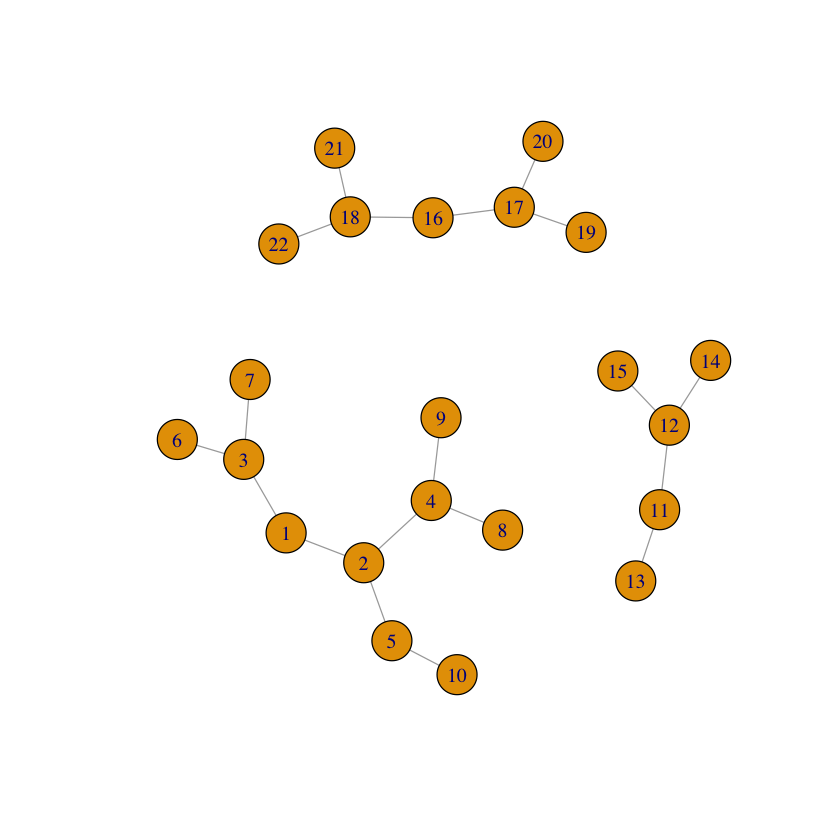

In [8]:
g<-graph.adjacency(M,mode="undirected")
plot(g)

2.k=5の時

In [9]:
n1<-8
tr1 <- make_tree(n1, mode = "undirected")
M1<-get.adjacency(tr1)
M1<-as.matrix(M1)
n2<-7
tr2 <- make_tree(n2, mode = "undirected")
M2<-get.adjacency(tr2)
M2<-as.matrix(M2)
n3<-5
tr3 <- make_tree(n3, mode = "undirected")
M3<-get.adjacency(tr3)
M3<-as.matrix(M3)
n4<-11
tr4 <- make_tree(n4, mode = "undirected")
M4<-get.adjacency(tr4)
M4<-as.matrix(M4)
n5<-13
tr5 <- make_tree(n5, mode = "undirected")
M5<-get.adjacency(tr5)
M5<-as.matrix(M5)

In [10]:
#なんでも良いのでn×nの行列の箱を作る
n<-n1+n2+n3+n4+n5
M<-matrix(1,n,n)

In [11]:
#箱に5つの隣接行列とゼロのブロックを埋めていく(もう少しスマートなコードはありそうだが、、、)
#まず5つの隣接行列を対角に埋める
M[1:n1,1:n1]<-M1
M[(n1+1):(n1+n2),(n1+1):(n1+n2)]<-M2
M[(n1+n2+1):(n1+n2+n3),(n1+n2+1):(n1+n2+n3)]<-M3
M[(n1+n2+n3+1):(n1+n2+n3+n4),(n1+n2+n3+1):(n1+n2+n3+n4)]<-M4
M[(n1+n2+n3+n4+1):(n1+n2+n3+n4+n5),(n1+n2+n3+n4+1):(n1+n2+n3+n4+n5)]<-M5

#ゼロブロック：1からn1行
M[1:n1,(n1+1):(n1+n2)]<-0
M[1:n1,(n2+1):(n1+n2+n3)]<-0
M[1:n1,(n3+1):(n1+n2+n3+n4)]<-0
M[1:n1,(n4+1):(n1+n2+n3+n4+n5)]<-0

#ゼロブロック：n1+1からn1+n2行
M[(n1+1):(n1+n2),1:n1]<-0
M[(n1+1):(n1+n2),(n1+n2+1):(n1+n2+n3)]<-0
M[(n1+1):(n1+n2),(n1+n2+n3+1):(n1+n2+n3+n4)]<-0
M[(n1+1):(n1+n2),(n1+n2+n3+n4+1):(n1+n2+n3+n4+n5)]<-0

#ゼロブロック：n1+n2+1からn1+n2+n3行
M[(n1+n2+1):(n1+n2+n3),1:n1]<-0
M[(n1+n2+1):(n1+n2+n3),(n1+1):(n1+n2)]<-0
M[(n1+n2+1):(n1+n2+n3),(n1+n2+n3+1):(n1+n2+n3+n4)]<-0
M[(n1+n2+1):(n1+n2+n3),(n1+n2+n3+n4+1):(n1+n2+n3+n4+n5)]<-0

#ゼロブロック：n1+n2+n3+1からn1+n2+n3+n4行
M[(n1+n2+n3+1):(n1+n2+n3+n4),1:n1]<-0
M[(n1+n2+n3+1):(n1+n2+n3+n4),(n1+1):(n1+n2)]<-0
M[(n1+n2+n3+1):(n1+n2+n3+n4),(n1+n2+1):(n1+n2+n3)]<-0
M[(n1+n2+n3+1):(n1+n2+n3+n4),(n1+n2+n3+n4+1):(n1+n2+n3+n4+n5)]<-0

#ゼロブロック：n1+n2+n3+n4+1からn1+n2+n3+n4+n5行
M[(n1+n2+n3+n4+1):(n1+n2+n3+n4+n5),1:n1]<-0
M[(n1+n2+n3+n4+1):(n1+n2+n3+n4+n5),(n1+1):(n1+n2)]<-0
M[(n1+n2+n3+n4+1):(n1+n2+n3+n4+n5),(n1+n2+1):(n1+n2+n3)]<-0
M[(n1+n2+n3+n4+1):(n1+n2+n3+n4+n5),(n1+n2+n3+1):(n1+n2+n3+n4)]<-0

In [12]:
M

0,1,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0


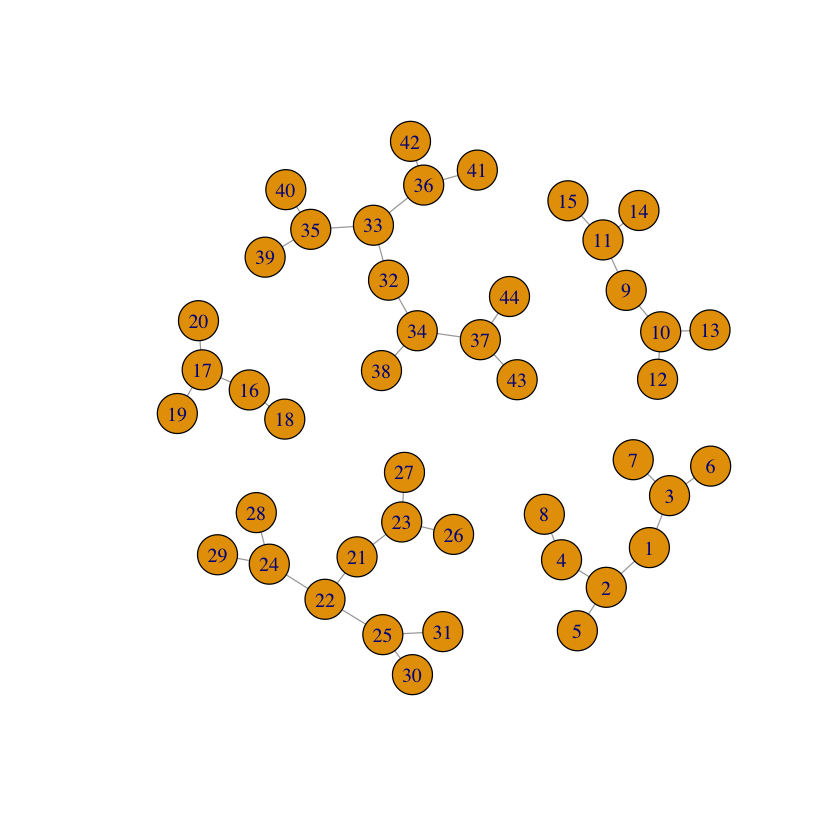

In [13]:
g<-graph.adjacency(M,mode="undirected")
plot(g)